In [2]:
import requests
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv"
res = requests.get(url, allow_redirects=True)
with open("income.csv", "wb") as file:
    file.write(res.content)

In [24]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


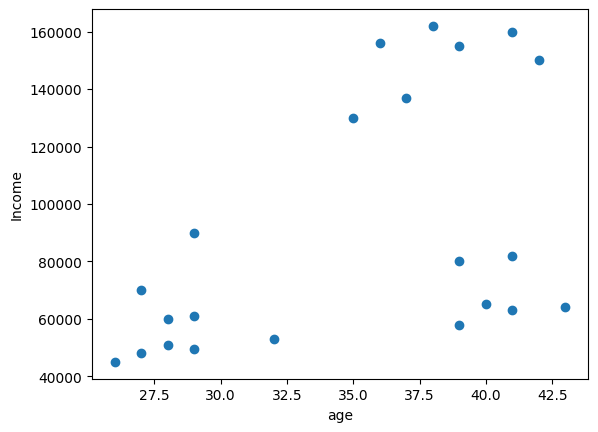

In [25]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel("age")
plt.ylabel("Income")
plt.show()

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [27]:
df['cluster'] = y_predict
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [28]:
c1 = df[df['cluster'] == 0]
c2 = df[df['cluster'] == 1]
c3 = df[df['cluster'] == 2]
c1

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


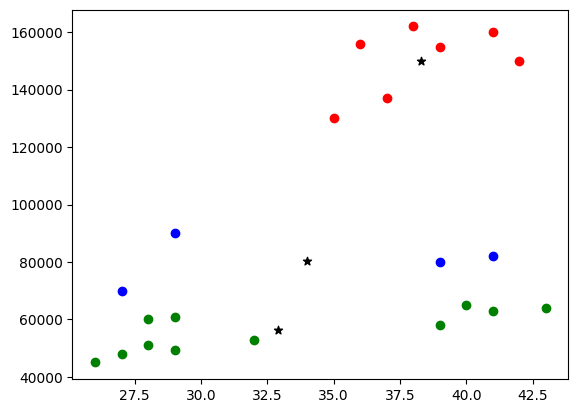

In [29]:
plt.scatter(c1['Age'], c1['Income($)'], color = 'green', label='income')
plt.scatter(c2['Age'], c2['Income($)'], color = 'red', label='income')
plt.scatter(c3['Age'], c3['Income($)'], color = 'blue', label='income')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker="*", label='centriod')

In [30]:
y = df[['cluster']]
y

,cluster
0,2
1,2
2,0
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

In [32]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


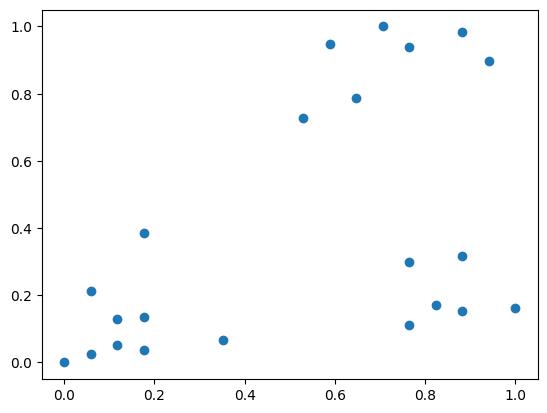

In [33]:
plt.scatter(df['Age'],df['Income($)'])

In [51]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [52]:
df['cluster'] = y_pred

In [53]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [54]:
c1 = df[df['cluster'] == 0]
c2= df[df['cluster'] == 1]
c3 = df[df['cluster'] == 2]

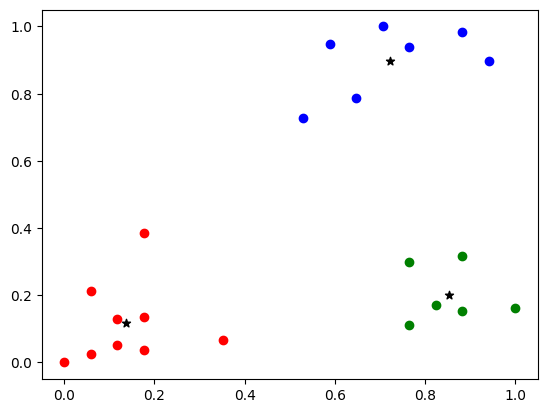

In [55]:
plt.scatter(c1['Age'], c1['Income($)'], color = 'green', label='income')
plt.scatter(c2['Age'], c2['Income($)'], color = 'red', label='income')
plt.scatter(c3['Age'], c3['Income($)'], color = 'blue', label='income')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker="*", label='centriod')

In [56]:
from sklearn.metrics import silhouette_score

silhouette_score(df[['Age', "Income($)"]], df['cluster'])

0.7129710183539274

### Elbow Method

In [68]:
list1 = []
k_rng = range(1,20) # n_clusters
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', 'Income($)']])
    list1.append(km.inertia_)

In [69]:
list1

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.26640301246684156,
 0.2411375993892335,
 0.184278684552248,
 0.14083648477890334,
 0.11304517838728054,
 0.0819190228677704,
 0.07854476223890353,
 0.04872229430461472,
 0.05723735446918836,
 0.031034992989344867,
 0.024091449048196437,
 0.01641649105272562,
 0.014457501426270841,
 0.007513957485122411,
 0.0054551225809321684]

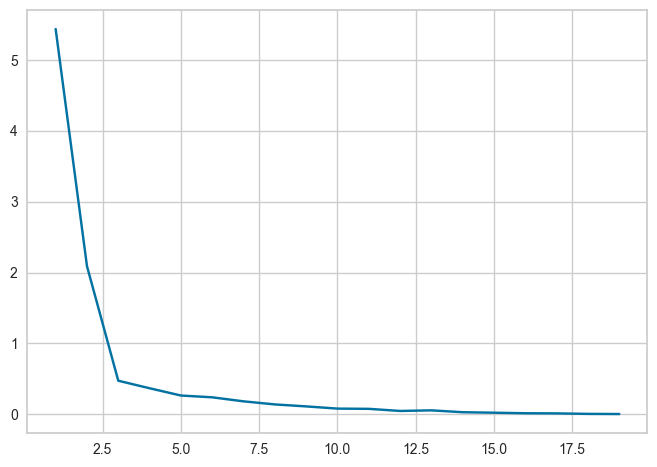

In [70]:
plt.plot(k_rng,list1)

In [61]:
!pip install yellowbrick

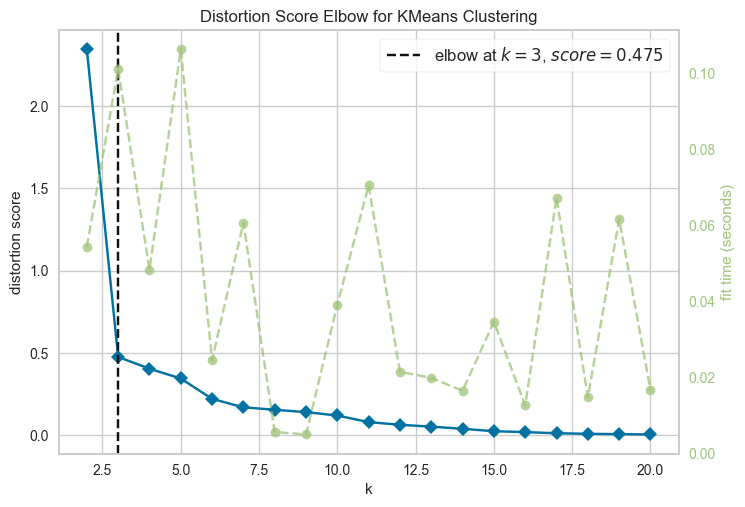

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
from yellowbrick.cluster import KElbowVisualizer

elbow = KElbowVisualizer(KMeans(), k = 20)
elbow.fit(df[['Age','Income($)']])
elbow.show()